In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import scipy 
from scipy import stats
from scipy.stats import norm, skew

In [2]:
#Importing Data
df = pd.read_csv('clean_kaggle_data.csv')
#Exploring Data
print(df.head())
print(df.describe())

   No  Duration (in seconds)     Q2   Q3                        Q4  Q5  \
0   4                    851  55-59  Man                    France  No   
1   8                    501  30-34  Man                   Germany  No   
2   9                    787    70+  Man                 Australia  No   
3  14                   1132  40-44  Man  United States of America  No   
4  17                    679  40-44  Man  United States of America  No   

       Q6_1 Q6_2                  Q6_3 Q6_4  ...  \
0  Coursera  NaN  Kaggle Learn Courses  NaN  ...   
1  Coursera  edX                   NaN  NaN  ...   
2  Coursera  NaN  Kaggle Learn Courses  NaN  ...   
3  Coursera  NaN  Kaggle Learn Courses  NaN  ...   
4  Coursera  NaN                   NaN  NaN  ...   

                             Q44_3                            Q44_4  \
0                              NaN  Kaggle (notebooks, forums, etc)   
1  Reddit (r/machinelearning, etc)                              NaN   
2                            

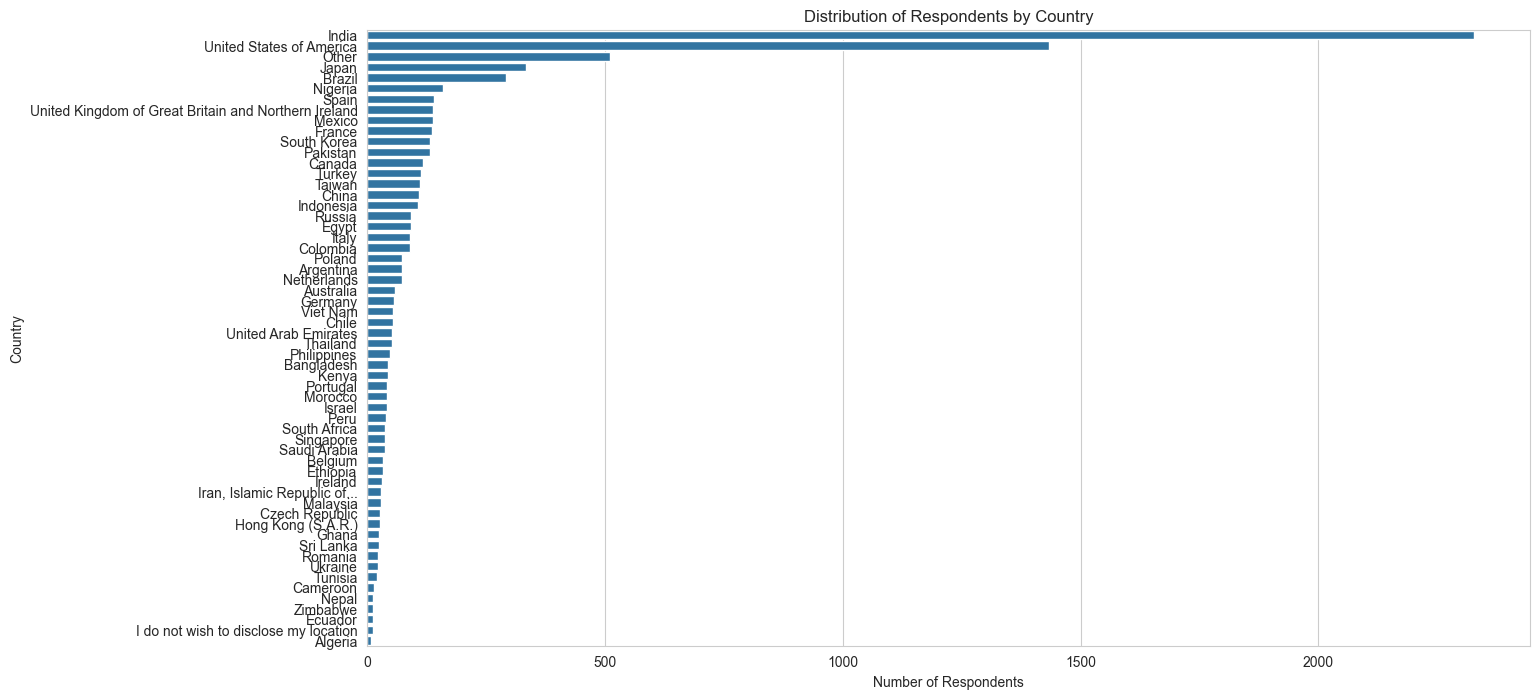

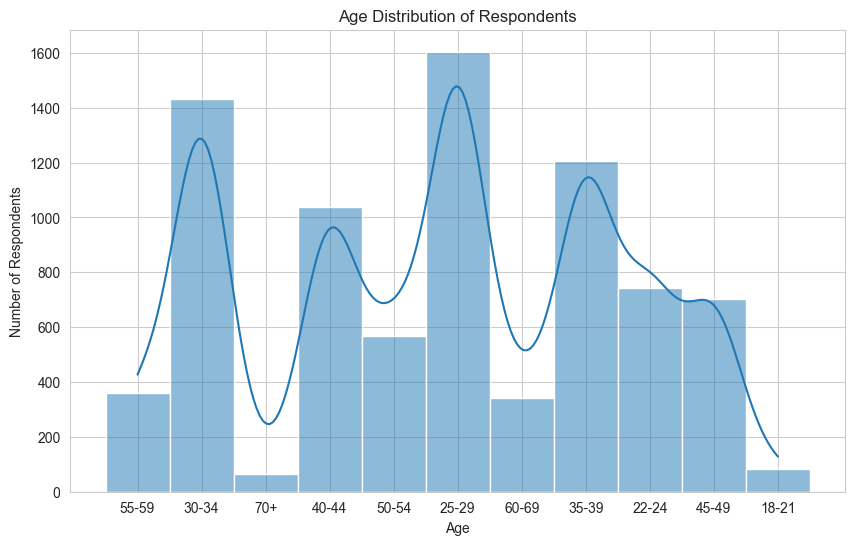

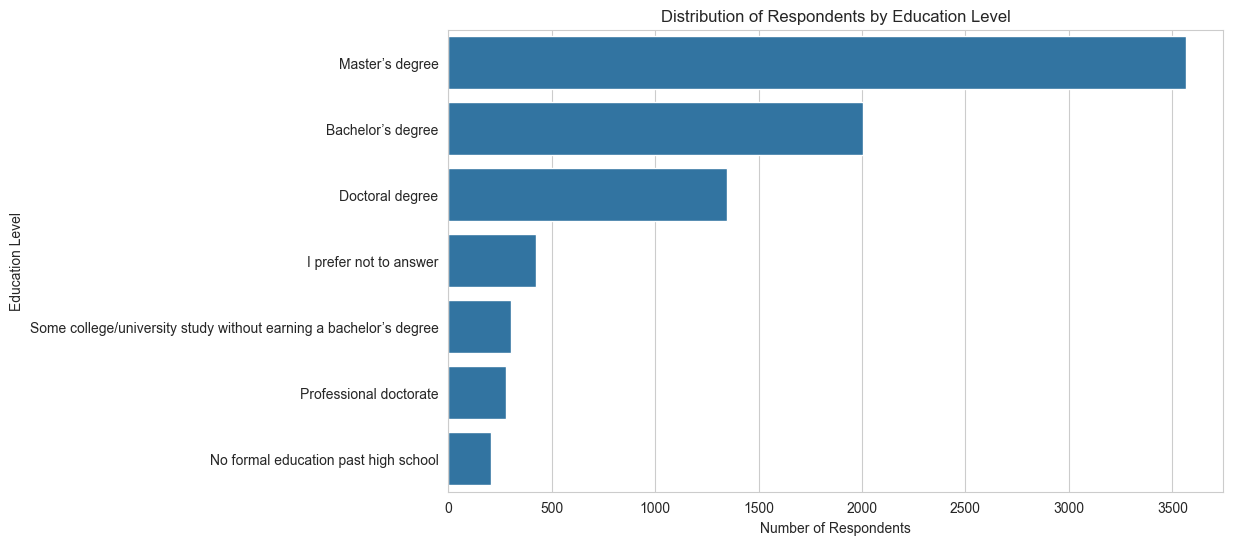

In [3]:
#Q1

# Setting the aesthetics for the plots
sns.set_style('whitegrid')

# 1. Distribution of respondents across countries
plt.figure(figsize=(15, 8))
country_order = df['Q4'].value_counts().index
sns.countplot(data=df, y='Q4', order=country_order)
plt.title('Distribution of Respondents by Country')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.show()

# 2. Age distribution of the respondents
plt.figure(figsize=(10, 6))
age_order = sorted(df['Q2'].unique())
sns.histplot(data=df, x='Q2', bins=10, kde=True)
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()

# 3. Distribution of educational qualifications
plt.figure(figsize=(10, 6))
education_order = df['Q8'].value_counts().index
sns.countplot(data=df, y='Q8', order=education_order)
plt.title('Distribution of Respondents by Education Level')
plt.xlabel('Number of Respondents')
plt.ylabel('Education Level')
plt.show()




Man's Descriptive Statistics:
 count      6509.000000
mean      53151.098479
std       64902.774841
min        1000.000000
25%        5000.000000
50%       25000.000000
75%       80000.000000
max      300000.000000
Name: Q29, dtype: float64

Woman's Descriptive Statistics:
 count      1366.000000
mean      40781.478770
std       57440.289248
min        1000.000000
25%        2000.000000
50%       15000.000000
75%       60000.000000
max      300000.000000
Name: Q29, dtype: float64

T-statistic: 7.06832573890473
P-value: 2.1074785983355064e-12
The difference between average salaries is statistically significant.


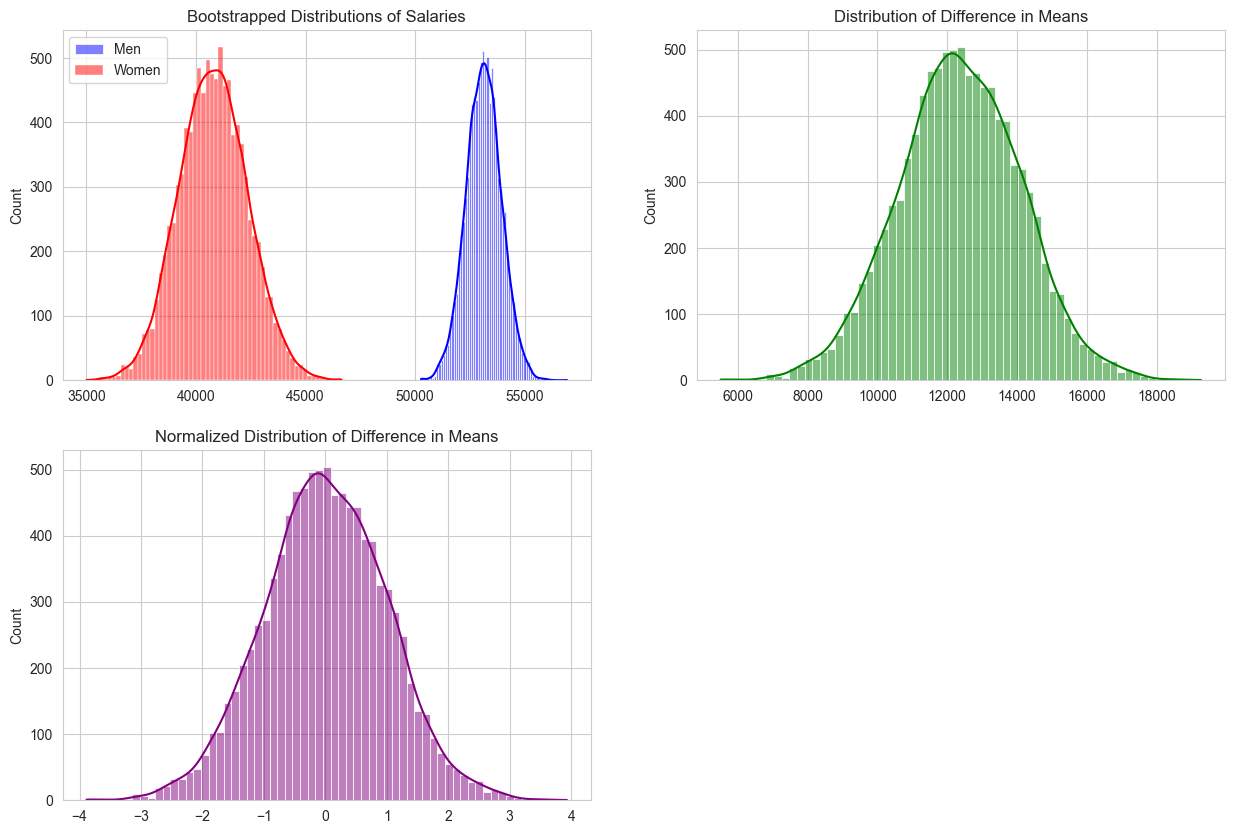


Bootstrap T-statistic: 703.8841478415807
Bootstrap P-value: 0.0
The difference between bootstrapped average salaries is statistically significant.

Comparison of T-values and P-values:
Original T-statistic: 7.06832573890473
Original P-value: 2.1074785983355064e-12
Bootstrap T-statistic: 703.8841478415807
Bootstrap P-value: 0.0


In [12]:
#Q2

# Read CSV
df = pd.read_csv('clean_kaggle_data.csv')

# a. Compute and report descriptive statistics for each group
# ------------------------------------------------------------------------------

# Drop rows with missing data
df_clean = df.dropna(subset=['Q3', 'Q29'])

# Removing outliers using Z-score
z_scores = np.abs(stats.zscore(df_clean['Q29']))
df_clean = df_clean[(z_scores < 3)]

# Compute descriptive statistics for each group
man_stats = df_clean[df_clean['Q3'] == 'Man']['Q29'].describe()
woman_stats = df_clean[df_clean['Q3'] == 'Woman']['Q29'].describe()

print("Man's Descriptive Statistics:\n", man_stats)
print("\nWoman's Descriptive Statistics:\n", woman_stats)

# b. Perform a two-sample t-test with a 0.05 threshold
# ------------------------------------------------------------------------------

man_salaries = df_clean[df_clean['Q3'] == 'Man']['Q29']
woman_salaries = df_clean[df_clean['Q3'] == 'Woman']['Q29']

t_stat, p_val = stats.ttest_ind(man_salaries, woman_salaries, equal_var=False)

print(f'\nT-statistic: {t_stat}\nP-value: {p_val}')

if p_val < 0.05:
    print("The difference between average salaries is statistically significant.")
else:
    print("The difference between average salaries is not statistically significant.")

# c. Bootstrap the data
# ------------------------------------------------------------------------------

def bootstrap(data, n_bootstrap):
    return np.random.choice(data, size=(n_bootstrap, len(data)), replace=True)

n_bootstrap = 10000

man_bootstrap_means = np.mean(bootstrap(man_salaries, n_bootstrap), axis=1)
woman_bootstrap_means = np.mean(bootstrap(woman_salaries, n_bootstrap), axis=1)
difference_means = man_bootstrap_means - woman_bootstrap_means
normalized_difference = (difference_means - np.mean(difference_means)) / np.std(difference_means)

# Plot the bootstrapped distributions
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(man_bootstrap_means, color='blue', kde=True, label='Men')
sns.histplot(woman_bootstrap_means, color='red', kde=True, label='Women')
plt.legend()
plt.title('Bootstrapped Distributions of Salaries')

plt.subplot(2, 2, 2)
sns.histplot(difference_means, color='green', kde=True)
plt.title('Distribution of Difference in Means')

plt.subplot(2, 2, 3)
sns.histplot(normalized_difference, color='purple', kde=True)
plt.title('Normalized Distribution of Difference in Means')
plt.show()

# d. Perform a two-sample t-test on the bootstrapped data
# ------------------------------------------------------------------------------

t_stat_bootstrap, p_val_bootstrap = stats.ttest_ind(man_bootstrap_means, woman_bootstrap_means, equal_var=False)

print(f'\nBootstrap T-statistic: {t_stat_bootstrap}\nBootstrap P-value: {p_val_bootstrap}')

if p_val_bootstrap < 0.05:
    print("The difference between bootstrapped average salaries is statistically significant.")
else:
    print("The difference between bootstrapped average salaries is not statistically significant.")

print(f"\nComparison of T-values and P-values:\nOriginal T-statistic: {t_stat}\nOriginal P-value: {p_val}\nBootstrap T-statistic: {t_stat_bootstrap}\nBootstrap P-value: {p_val_bootstrap}")

# e. Comment on your findings
# ------------------------------------------------------------------------------
# You'll need to look at the results and form your own conclusions based on the outputs and the differences in the T-values and P-values.


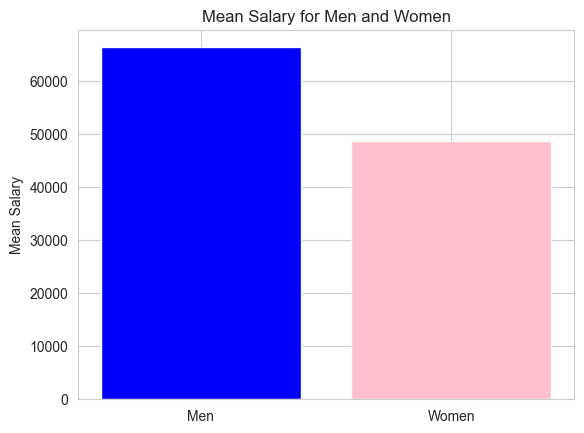

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('clean_kaggle_data.csv')

# Filtering for relevant data
df_clean = df.dropna(subset=['Q3', 'Q29'])
df_men = df_clean[df_clean['Q3'] == 'Man']
df_women = df_clean[df_clean['Q3'] == 'Woman']

# Extracting salaries
man_salaries = df_men['Q29']
woman_salaries = df_women['Q29']

# Calculate means
mean_men = man_salaries.mean()
mean_women = woman_salaries.mean()

# Plotting
labels = ['Men', 'Women']
means = [mean_men, mean_women]

plt.bar(labels, means, color=['blue', 'pink'])
plt.ylabel('Mean Salary')
plt.title('Mean Salary for Men and Women')
plt.show()


Bachelor’s degree Descriptive Statistics:
 count       2005.000000
mean       53855.112219
std       115708.228065
min         1000.000000
25%         3000.000000
50%        15000.000000
75%        60000.000000
max      1000000.000000
Name: Q29, dtype: float64

Master’s degree Descriptive Statistics:
 count       3567.000000
mean       65620.128960
std       108747.716468
min         1000.000000
25%         7500.000000
50%        30000.000000
75%        80000.000000
max      1000000.000000
Name: Q29, dtype: float64

Doctoral degree Descriptive Statistics:
 count       1349.000000
mean       84376.945886
std       131631.895507
min         1000.000000
25%         7500.000000
50%        50000.000000
75%       100000.000000
max      1000000.000000
Name: Q29, dtype: float64

F-statistic: 28.152539364189636
P-value: 6.652646073250012e-13


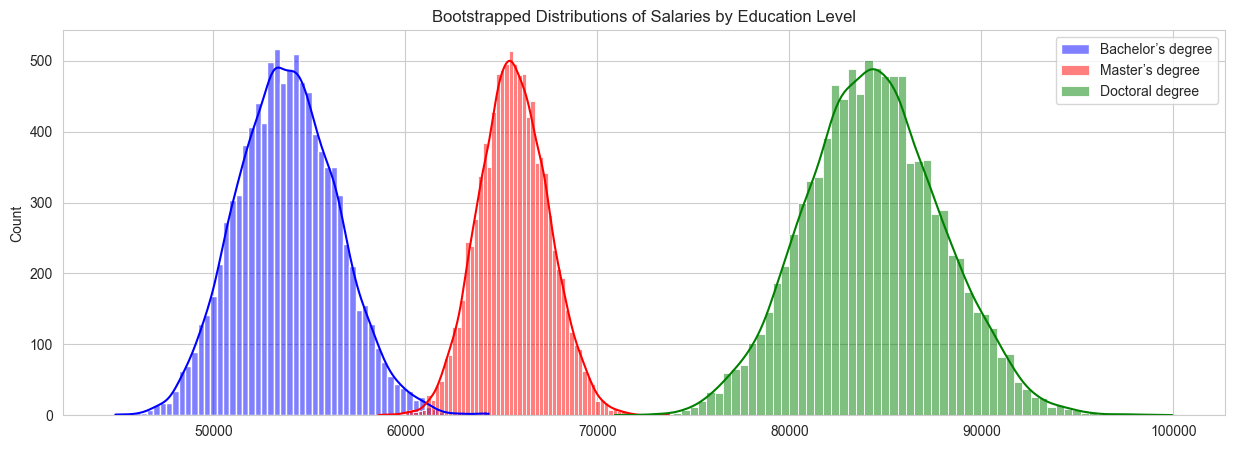


Bootstrap F-statistic: 313083.4811872107
Bootstrap P-value: 0.0

Comparison of F-values and P-values:
Original F-statistic: 28.152539364189636
Original P-value: 6.652646073250012e-13
Bootstrap F-statistic: 313083.4811872107
Bootstrap P-value: 0.0


In [13]:
#Q3
# Read the dataset
df = pd.read_csv('clean_kaggle_data.csv')

# a. Compute and report descriptive statistics for each group
# ------------------------------------------------------------------------------

# Filter data only for the three degrees of interest
degrees = ['Bachelor’s degree', 'Master’s degree', 'Doctoral degree']
df_clean = df[df['Q8'].isin(degrees)]

# Drop rows with missing data
df_clean = df_clean.dropna(subset=['Q8', 'Q29'])

bachelors_stats = df_clean[df_clean['Q8'] == 'Bachelor’s degree']['Q29'].describe()
masters_stats = df_clean[df_clean['Q8'] == 'Master’s degree']['Q29'].describe()
doctoral_stats = df_clean[df_clean['Q8'] == 'Doctoral degree']['Q29'].describe()

print("Bachelor’s degree Descriptive Statistics:\n", bachelors_stats)
print("\nMaster’s degree Descriptive Statistics:\n", masters_stats)
print("\nDoctoral degree Descriptive Statistics:\n", doctoral_stats)

# b. ANOVA for hypothesis testing
# ------------------------------------------------------------------------------

f_stat, p_val = stats.f_oneway(
    df_clean[df_clean['Q8'] == 'Bachelor’s degree']['Q29'],
    df_clean[df_clean['Q8'] == 'Master’s degree']['Q29'],
    df_clean[df_clean['Q8'] == 'Doctoral degree']['Q29']
)

print(f'\nF-statistic: {f_stat}\nP-value: {p_val}')

# c. Bootstrap the data
# ------------------------------------------------------------------------------

def bootstrap(data, n_bootstrap):
    return np.random.choice(data, size=(n_bootstrap, len(data)), replace=True)

n_bootstrap = 10000

bachelors_bootstrap_means = np.mean(bootstrap(df_clean[df_clean['Q8'] == 'Bachelor’s degree']['Q29'], n_bootstrap), axis=1)
masters_bootstrap_means = np.mean(bootstrap(df_clean[df_clean['Q8'] == 'Master’s degree']['Q29'], n_bootstrap), axis=1)
doctoral_bootstrap_means = np.mean(bootstrap(df_clean[df_clean['Q8'] == 'Doctoral degree']['Q29'], n_bootstrap), axis=1)

# Plot the bootstrapped distributions
plt.figure(figsize=(15, 5))
sns.histplot(bachelors_bootstrap_means, color='blue', kde=True, label='Bachelor’s degree')
sns.histplot(masters_bootstrap_means, color='red', kde=True, label='Master’s degree')
sns.histplot(doctoral_bootstrap_means, color='green', kde=True, label='Doctoral degree')
plt.legend()
plt.title('Bootstrapped Distributions of Salaries by Education Level')
plt.show()

# d. ANOVA on the bootstrapped data
# ------------------------------------------------------------------------------

f_stat_bootstrap, p_val_bootstrap = stats.f_oneway(bachelors_bootstrap_means, masters_bootstrap_means, doctoral_bootstrap_means)

print(f'\nBootstrap F-statistic: {f_stat_bootstrap}\nBootstrap P-value: {p_val_bootstrap}')

# e. Comparison of F-values and P-values
# ------------------------------------------------------------------------------

print(f"\nComparison of F-values and P-values:\nOriginal F-statistic: {f_stat}\nOriginal P-value: {p_val}\nBootstrap F-statistic: {f_stat_bootstrap}\nBootstrap P-value: {p_val_bootstrap}")

